# Week 5 Assignment

Name: Uma Devi Manthapuram

Student ID: 3045896

Course: MSDS_600X40

Professor: Christy Pearson

# Data science automation


Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

# Data Loading:

In this assignment, we are using customer churn data prepared in week 2 in which we have converted categorical variables to numeric.

In [1]:
import pandas as pd

df = pd.read_csv('/Users/arungajjela/Documents/Uma/MSDS600/MSDS600 Week2/prepared_churn_data.csv', index_col='customerID')
df

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Total_MonthlyCharges
customerID,,,,,,,,,
7590-VHVEG,0,1,0,0,0,3.396185,29.85,0,8.789274
5575-GNVDE,1,34,1,1,1,4.042174,1889.50,0,467.446514
3668-QPYBK,2,2,1,0,1,3.986202,108.15,1,27.131086
7795-CFOCW,3,45,0,1,2,3.744787,1840.75,0,491.549975
9237-HQITU,4,2,1,0,0,4.258446,151.65,1,35.611586
...,...,...,...,...,...,...,...,...,...
6840-RESVB,7038,24,1,1,1,4.440296,1990.50,0,448.280972
2234-XADUH,7039,72,1,1,3,4.636669,7362.90,0,1587.971933
4801-JZAZL,7040,11,0,0,0,3.387774,346.45,0,102.264780


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7043 non-null   int64  
 1   tenure                7043 non-null   int64  
 2   PhoneService          7043 non-null   int64  
 3   Contract              7043 non-null   int64  
 4   PaymentMethod         7043 non-null   int64  
 5   MonthlyCharges        7043 non-null   float64
 6   TotalCharges          7043 non-null   float64
 7   Churn                 7043 non-null   int64  
 8   Total_MonthlyCharges  7043 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 550.2+ KB


# Using pycaret to find an ML algorithm that performs best on the data:

PyCaret is a Python library that simplifies machine learning for tasks like classification and regression. It acts like an assistant, automating data cleaning, model selection, training, and analysis.

PyCaret can analyze our data and apply different algorithms. It will also compare their performance and help us find the best algorithm for the data.


In [3]:
from pycaret.classification import ClassificationExperiment

In [4]:
automl = ClassificationExperiment()

In [5]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,3197
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 9)"
4,Transformed data shape,"(7043, 9)"
5,Transformed train set shape,"(4930, 9)"
6,Transformed test set shape,"(2113, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [6]:
automl

In [7]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7868,0.8314,0.4579,0.6370,0.5319,0.3989,0.4084,0.1180
ridge,Ridge Classifier,0.7862,0.8155,0.3983,0.6627,0.4965,0.3716,0.3914,0.0120
lr,Logistic Regression,0.7860,0.8256,0.4824,0.6268,0.5443,0.4077,0.4142,0.5670
lda,Linear Discriminant Analysis,0.7850,0.8155,0.4778,0.6261,0.5411,0.4041,0.4109,0.0110
ada,Ada Boost Classifier,0.7838,0.8296,0.4679,0.6242,0.5338,0.3970,0.4046,0.0410
lightgbm,Light Gradient Boosting Machine,0.7822,0.8214,0.4946,0.6109,0.5461,0.4050,0.4092,0.6340
rf,Random Forest Classifier,0.7815,0.8123,0.4771,0.6141,0.5363,0.3965,0.4023,0.0960
et,Extra Trees Classifier,0.7708,0.8044,0.4633,0.5853,0.5166,0.3693,0.3739,0.0940
dummy,Dummy Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0110
dt,Decision Tree Classifier,0.7247,0.6512,0.4946,0.4828,0.4883,0.3002,0.3004,0.0130


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

`best_model = automl.compare_models()` in PyCaret refers to the comparison and select best performing model for machine learning task

From the above result GBC may seem more efficient at most volumes, ultimately the "best model" depends on your specific preferences. Here is a breakdown of things to consider.

**Overall Precision vs Specific Class Performance:** If overall accuracy is important, GBC might be the best choice. However, if there is a greater need to identify (remember) victimized customers, a Ridge Classifier may be preferred.

**Balance between accuracy and recall:** If we want to avoid false positives (predict churn when it won’t), focus on more accurate images (GBC in this case).


In churn forecasting, a good balance between accuracy, recall and accuracy is often desired. Considering these features and the results presented, both Gradient Boosting Classifier (GBC) and Ridge Classifier (Ridge) can be strong candidates for further research You may want to test their performance on a validation set as it is separately for final decision.

In [8]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3197, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [9]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

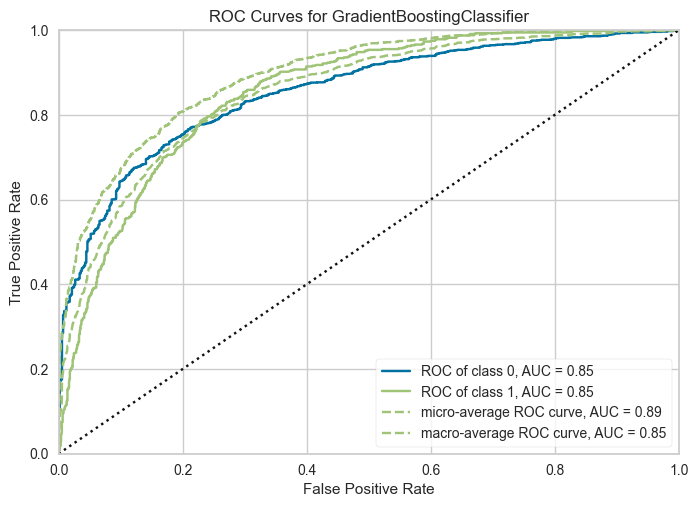

In [10]:
automl.plot_model(best_model)

- The ROC Curve for the GradientBoostingClassifier appears above the diagonal line, indicating some ability to discriminate between churned and non-churned clients
- The higher the curve is to the upper left, the better the model performance. Ideally, the curve would hug the left boundary and the top of the graph.

Above plot have multiple AUC values. By comparing these AUC values, you can see if the model performs consistently well across both churned and non-churned customer classes.

Overall, the ROC Curve and AUC values suggest that the LogisticRegression model might have some potential for churn prediction in this dataset

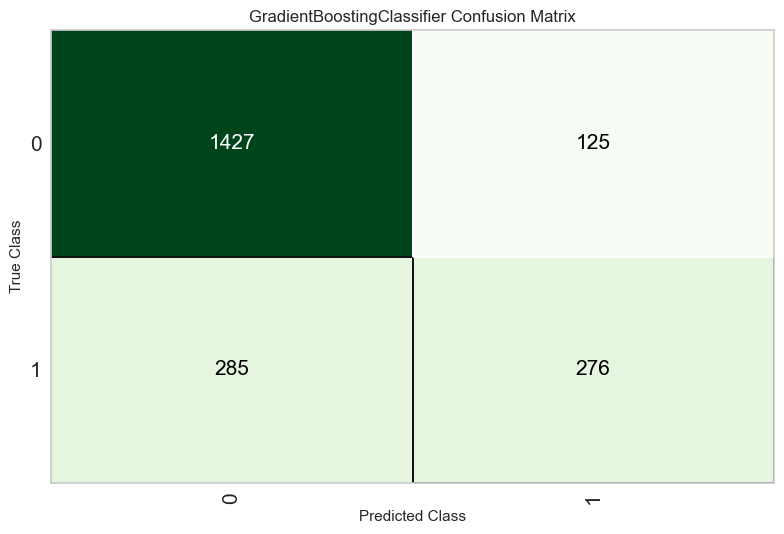

In [11]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [12]:
df.iloc[-2:-1].shape

(1, 9)

In [13]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Total_MonthlyCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,,
8361-LTMKD,7041,4,1,0,1,4.309456,306.600006,71.145874,1,1,0.715


In [14]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8194,0.8696,0.5131,0.7260,0.6013,0.4889,0.5012


In [15]:
predictions.head()

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Total_MonthlyCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,,,
7590-VHVEG,0,1,0,0,0,3.396185,29.850000,8.789274,0,1,0.8674
5575-GNVDE,1,34,1,1,1,4.042174,1889.500000,467.446503,0,0,0.9101
3668-QPYBK,2,2,1,0,1,3.986202,108.150002,27.131086,1,1,0.6988
7795-CFOCW,3,45,0,1,2,3.744787,1840.750000,491.549988,0,0,0.9141
9237-HQITU,4,2,1,0,0,4.258446,151.649994,35.611588,1,1,0.7619


# Save the model to disk

In [16]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'tenure',
                                              'PhoneService', 'Contract',
                                              'PaymentMethod', 'MonthlyCharges',
                                              'TotalCharges',
                                              'Total_MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strateg...
                           

The line `automl.save_model(best_model, 'pycaret_model')` utilizes the save_model function within PyCaret to preserve the chosen "best model" for later use.

- Saving the model makes it persist beyond the current Python session. You can incorporate it later to predict new data without having to retrain the model from scratch.
- The stored model can be predicted to be reused on data sets with similar
- This saves training time for future projects.
- We can share the stored model with others who can use it to make predictions without the need for original data or training codes.

# Python script/file/module with a function

In [35]:
0.9859
import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads diabetes data into a DataFrame from a string filepath.
    """
    return pd.read_csv(filepath)

def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, df)
    churn_prob = predictions["Churn"]  # Assuming single row prediction
    return churn_prob



if __name__ == "__main__":
    df = load_data('/Users/arungajjela/Documents/Uma/MSDS600/MSDS600 Week2/prepared_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

Transformation Pipeline and Model Successfully Loaded
predictions:
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int8


# Analysis

In this assignment, we used customer churn data prepared in week 2 to predict churn using machine learning models. This assignment examines customer churn prediction using PyCaret, a robust machine learning platform. We participate in the process of selecting the best model based on the appropriate metric, saving the selected models, and executing customized Python functions to determine the likelihood of creating new data.

The PyCaret automl function simplifies the model selection process. It trains and tests machine learning models on prepared churn data. By specifying target variables (churn) and ignoring other attributes, we direct the test toward the desired predictive function.

The metric chosen plays an important role. PyCaret trains and compares images, ultimately choosing the one that gets the best accuracy. This gives the selected sample a balance between precision and recall, making it well suited to identifying potential churners in terms of reducing false alarms.

Once PyCaret finds the best model based on the accuracy, we use the save_model function. This function configures the model and saves it to disk with the selected filename. This allows the trained model to be preserved for future use. Instead of retraining the model every time new data becomes available, we can simply load the stored model and use its known patterns to make predictions.

To make predictions about new data easier, we create a custom Python function. This function takes pandas DataFrame (df) as input, which represents additional customer data for churn prediction. These custom functions provide an easy way to integrate the trained model with various applications. We can use it to predict opportunities to create new customer profiles, enabling us to take proactive measures to retain valuable customers.

To check the generalizability of the model, we use a separate data set with additional customer data (which is not used during training). This new data is inserted into a pandas DataFrame, and the function is used. The program returns the predicted churn probabilities for each customer in the new data. Alternatively, we can compare these predicted probabilities with actual churn values ​​(given for this model) to gain insight into the accuracy of the model. A greater correlation between predicted outcomes and actual churn will determine how effective the model is at identifying potential churners.